
# Laboratorio 3 Regresión Lineal
---
*   **Gustavo Adolfo Tabima Luque - 201914586** Modelo analitico, evaluación cualitativa.
*   **Juan  Carlos Eduardo Nunes Ariza-202010826** Visualización
*   **César Luis Moreno González - 201924899** Regresión, pipeline y evaluación cuantitativa.
---

Partimos viendo que en laboratorio tenemos como objetivo estimar el valor de admisión de un estudiante. Esto, como vemos, es un valor continuo, por lo que viendo dichas ideas nos encontramos con una tarea de lenguaje supervisado, con una técnica de regresión, especificamente con el algoritmo de regresión lineal.

[Presentación con los resultados](https://docs.google.com/presentation/d/1kYoheT4N80MzKIZeo9uay90fpigQ7AzS5hfJb3IsfuY/edit?usp=sharing)



# 0. Importación de Librerias

In [ ]:
seed = 161
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
# Regresion lineal
from sklearn.linear_model import LinearRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error as r2_score
# q-q plots
import scipy.stats as stats

# 1. Carga de datos

In [ ]:
df=pd.read_csv('202220_Laboratorio_3_data_university_admission_train.csv', sep=',', encoding = 'utf-8')
print("Contamos con un total de " + str(df.shape[0]) + " registros iniciales.")
print("Agrupados en un total de " + str(df.shape[1]) + " columnas.")

Contamos con un total de 1569 registros iniciales.
Agrupados en un total de 10 columnas.


# 2. Entendimiento y procesamiento de los datos

In [ ]:
df.isna().sum()

Unnamed: 0            0
Serial No.            0
GRE Score             0
TOEFL Score           0
University Rating     0
SOP                   0
LOR                   0
CGPA                  0
Research              0
Admission Points     65
dtype: int64

Para el procesamiento inicial de los datos, vemos que debemos tratar los datos nulos, los cuales decidimos eliminar, pues consiste en nuestra variable objetivo e incluirla afectaria en el desempeño de nuestro modelo.

In [ ]:
df_duplicado = df
df_duplicado = df_duplicado.dropna(0)
df_duplicado = df_duplicado.drop('Unnamed: 0',axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  


Vemos que el GRE, TOEFL Score cuentan con valores coherentes en terminos de negocio, por lo que decidimos no tratarlos.

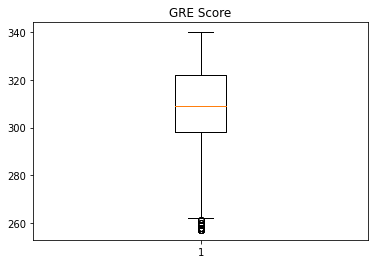

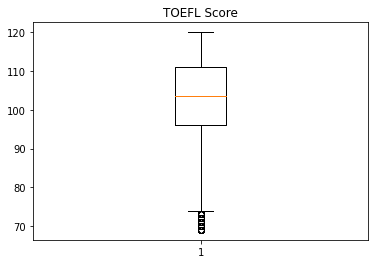

In [ ]:
plt.title("GRE Score")
plt.boxplot(df_duplicado["GRE Score"])
plt.show()
plt.title("TOEFL Score")
plt.boxplot(df_duplicado["TOEFL Score"])
plt.show()

En esta sección, para la identificación de outliers, vemos que las columnas a tratar cuentan con valores coherentes en terminos de negocio, por lo que decidimos no tratarlas.

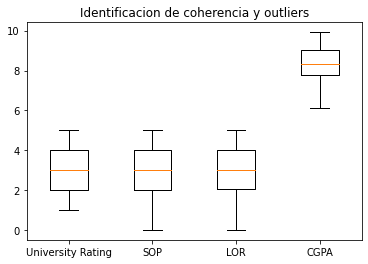

In [ ]:
University_Rating = df_duplicado['University Rating']
SOP = df_duplicado['SOP']
LOR = df_duplicado['LOR ']
CGPA = df_duplicado['CGPA']
columns = [University_Rating, SOP, LOR, CGPA]
fig, ax = plt.subplots()
plt.xticks([], ["University Rating", "SOP","LOR","CGPA",])
ax.boxplot(columns)
plt.title("Identificacion de coherencia y outliers")
plt.show()

# 3. Identificación de variables a utilizar

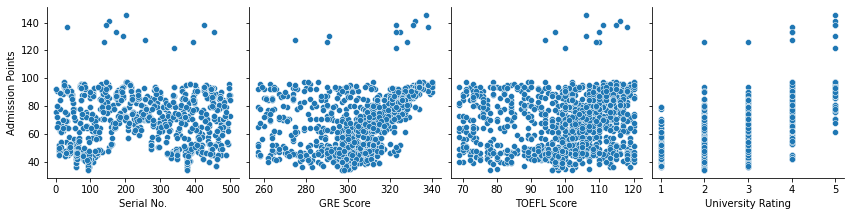

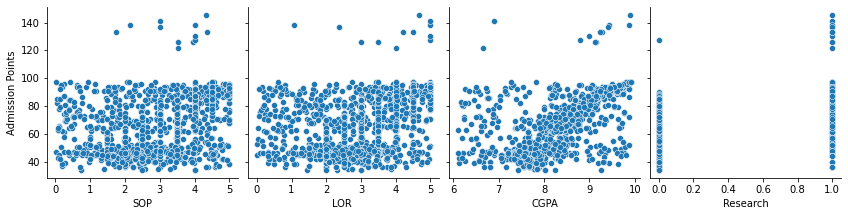

In [ ]:
sns.pairplot(df_duplicado, height=3, y_vars = 'Admission Points', x_vars = df_duplicado.columns[0:4], kind='scatter')
sns.pairplot(df_duplicado, height=3, y_vars = 'Admission Points', x_vars = df_duplicado.columns[4:8], kind='scatter')

Donde vemos que todas las variables muestran linealidad, con la unica excepción del Research, razón por la cual vamos a descartarla.

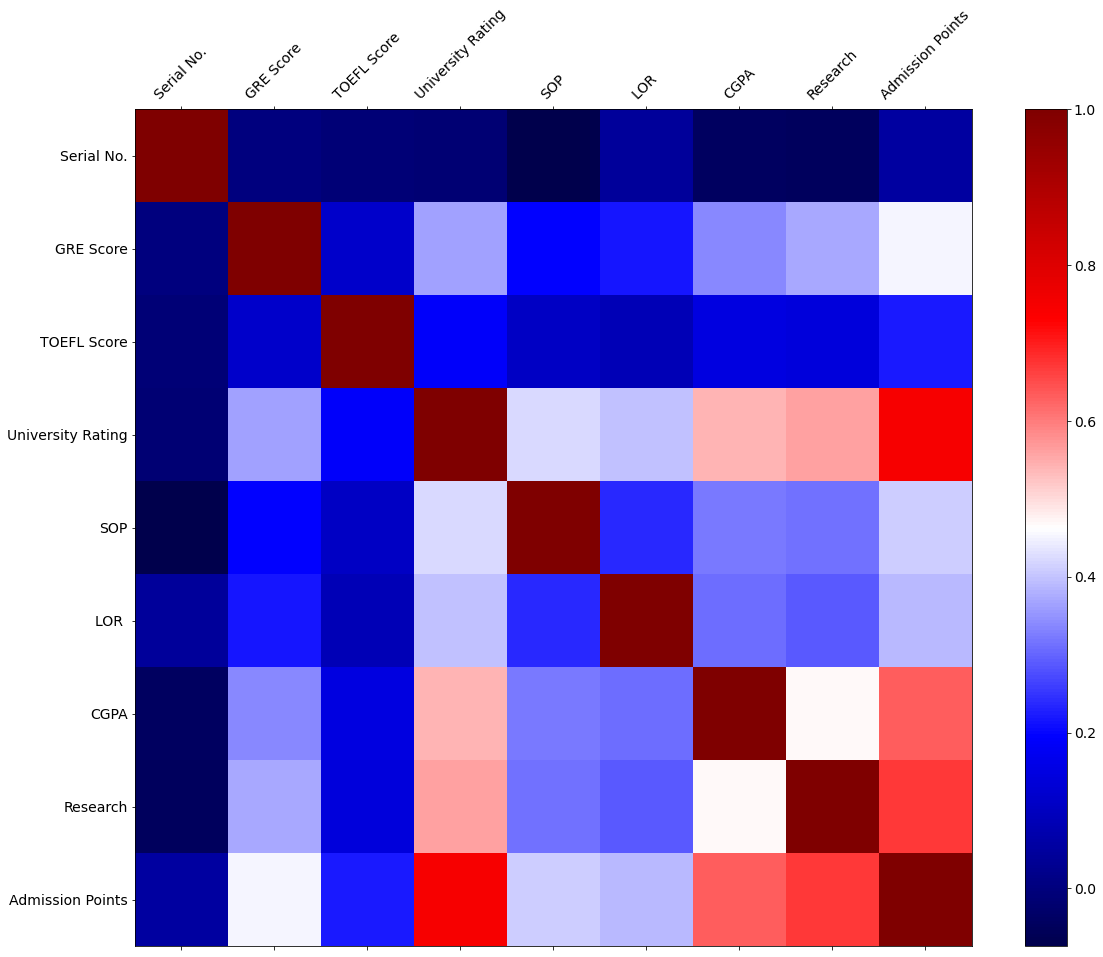

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_duplicado.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df_duplicado.select_dtypes(['number']).shape[1]), df_duplicado.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_duplicado.select_dtypes(['number']).shape[1]), df_duplicado.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

Donde vemos que las variables menos incidentes corresponde al TOEFL, aunque conocemos que es una variable incidente dado el contexto de negocio, por lo que decidimos no descartarla y continuar con su uso.

# 4. Regresión


## 4.1 Creación del PipeLine

In [ ]:
columnas = [ 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA']

pre = [('initial',ColumnTransformer([("selector", 'passthrough',columnas)])),]
model = [('model', LinearRegression(normalize = False))]
pipeline = Pipeline(pre+model)

In [ ]:
X = df_duplicado.drop('Admission Points', axis = 1)
Y = df_duplicado['Admission Points']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


pipeline = pipeline.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


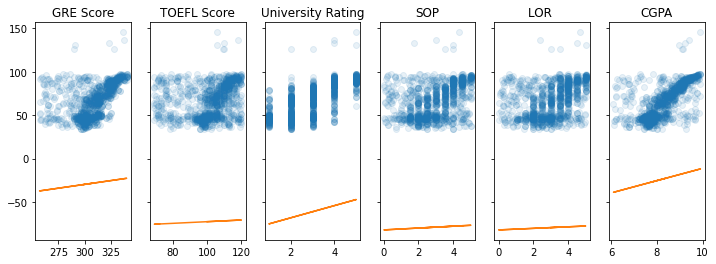

In [ ]:
f, axs = plt.subplots(1, len(columnas), sharey=True, figsize = (12,4))

for i in range(len(columnas)):

    pos_col = i
    col = columnas[pos_col]

    # Variable x
    x = X_train[col]
    # Pendiente
    m = pipeline['model'].coef_[pos_col]
    # Interceto
    b = pipeline['model'].intercept_

    axs[i].plot(x, Y_train, 'o', alpha = 0.1)
    axs[i].plot(x, x*m + b)
    axs[i].set_title(col)


Aqui podemos ver como se comporta la tendencia  con respecto a la linea e la regresion.

# 4.2 Interpretación del Modelo

Donde podemos ver que las variables con mayor incidencia corresponden a University Rating, y CGPA, según sus coeficientes.

In [ ]:
pd.DataFrame({'columns':columnas, 'coef':pipeline['model'].coef_})

,columns,coef
0,GRE Score,0.174893
1,TOEFL Score,0.094970
2,University Rating,6.997943
3,SOP,1.070219
4,LOR,0.897139
5,CGPA,7.095083


## 4.3 Exportación del Modelo

In [ ]:
filename = 'modelo.joblib'
dump(pipeline, filename)
p2 = load(filename)

In [ ]:
df_duplicado['Admission Points'] = p2.predict(df_duplicado)

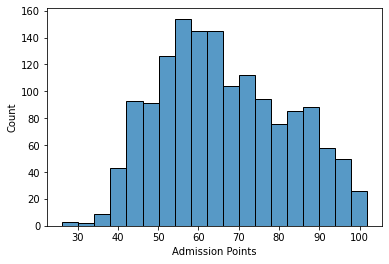

In [ ]:
sns.histplot(df_duplicado['Admission Points'])

Donde vemos que, aunque los datos de admisión lleguen a 150, en este caso no superan los 100, y la mayoria de estos se encuentran sobre los 60 puntos de admisión.

# 5. Evaluación cuantitativa

Vemos que considerando los resultados, contamos con errores minimales, por lo que recomendamos altamente su uso en el negocio, unicamente si el puntaje predicho es menor a 100, pues no contamos con pruebas referentes a valores mayores, razón por la cual en dicho escenario no se recomienda su uso.

In [ ]:
p2 = pipeline
X = df_duplicado.drop('Admission Points', axis = 1)
y = df_duplicado['Admission Points']
y_true = Y_test
y_predicted = p2.predict(X_test)

# Note que hay que sacarle la raiz al valor
print("Donde vemos que contamos con un error de RMSE de: " + str(np.sqrt(mse(y_true, y_predicted))))

Donde vemos que contamos con un error de RMSE de: 12.293400902987408


In [ ]:
y_true = y
y_predicted = p2.predict(X)

# Note que hay que sacarle la raiz al valor
np.sqrt(mse(y_true, y_predicted))

0.0

Donde vemos que no contamos con outliers que manejar.

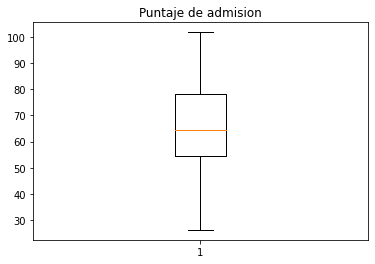

In [ ]:
plt.title("Puntaje de admision")
plt.boxplot(y_predicted)
plt.show()

Donde vemos que, nuestra distribución es similar a la distribución normal, luego terminamos contando con un grafico que ilustra ello, donde el probability plot nos muestra el error con dichos valores, existiendo, pero siendo minimo, como vemos que se acerca a la linea.

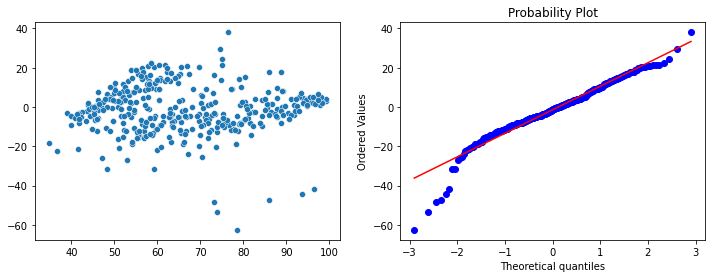

In [ ]:
errors = (p2.predict(X_test) - Y_test).values

fig, axes = plt.subplots(1, 2, figsize = (12,4))
sns.scatterplot(x = p2.predict(X_test), y = errors, alpha = 1, ax = axes[0])
_ = stats.probplot(errors, dist="norm", plot=axes[1])

# 6. Evaluación cualitativa
---
###¿Qué obtuvieron con el ejercicio de regresión?
Realizando la regresión respectiva podemos darnos cuenta de datos interesantes, como la influencia de los resultados en la variable de escogencia de estudiantes, como se puede ver en la gráfica del punto 4.1 se ve que hay variables que tienen incidencia lineal, pero las que no la tienen son las siguientes:Serial No., TOEFL Score, Serial porque no aplica y TOEFL es porque por ejemplo, investigando en los requisitos de maestría, no muchas maestrías piden un puntaje de inglés en el TOEFL.



###¿Cuáles son las variables más influyentes y que tan confiables son los resultados?.
la influencia de los factores como  el GRE Score, El rating de la Universidad en la que hicieron pregrado, y el CGOPA, estas relaciones tienen mucho que ver con que un estudiante sea admitido para el programa de maestría o no, por lo que se de puede afirmar que las universidades con ranking de 4 a 5 tendrán los mayores índices de aceptación entre sus estudiantes, también los estudiantes con el CGDPA mayor a 8 podrán ser buenos candidatos para la Universidad


# 7. Visualización de los resultados

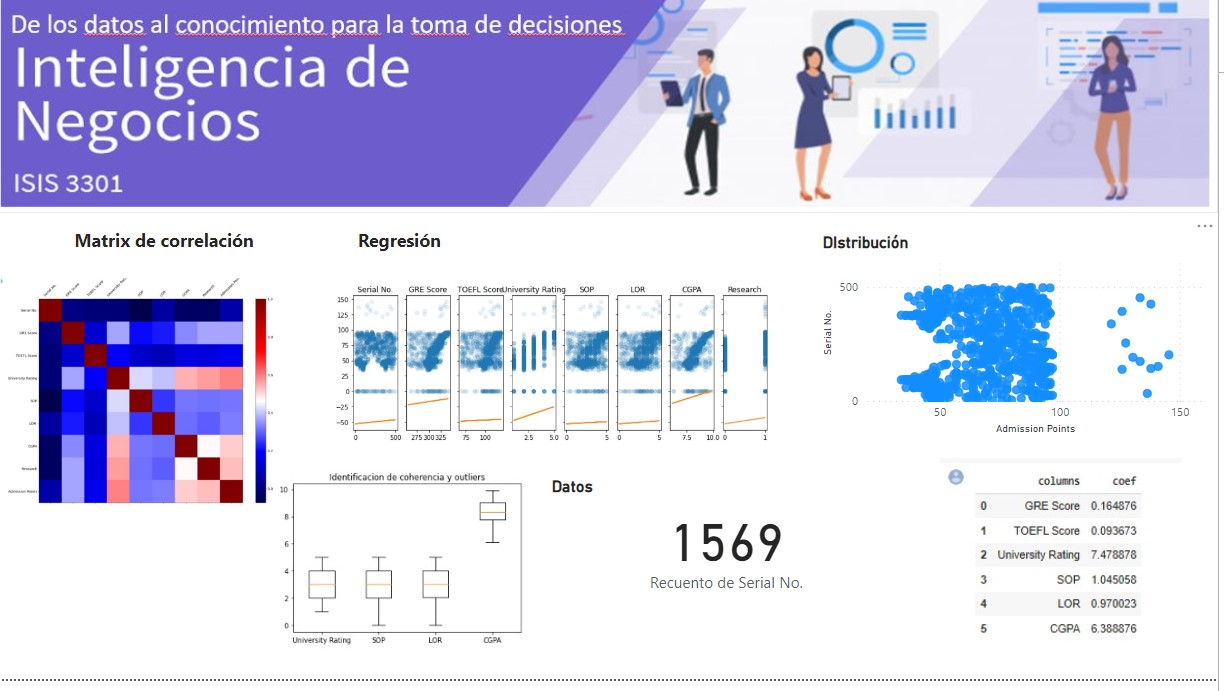

Podemos ver en la grafica izquierda la correlacion de los datos.  En la grafica de regresion pudimos observar la tendecia y la proporcionalidad a la linea de regresion spbre los 1569 datos.   En el boxplot podemos verificar los outliers. Y en la  tabla inferior derecha observamos los coeficentes, lo cuales fueron   importantes para la toma de decisiones sobre los datos.

# 8. Recomendaciones finales
Dados los puntajes obtenidos, y viendo la distribución de los datos, vemos que este modelo puede apoyar a la estimación de los puntajes de admisión, idealmente si el puntaje es menor a 100, pues este modelo presenta inconsistencias para valores mayores. Esto nos muestra que no es ideal para dichas situaciones, luego los valores cercanos a 100 deberian ser revisados posterior a su generación, aunque inegablemente muestra un ahorro potencial.